In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

import warnings
warnings.filterwarnings("ignore")

In [17]:
pwd

'C:\\Users\\Del\\Downloads\\KNN models'

In [18]:
df = pd.read_csv(r'C:\\Users\\Del\\Downloads\\Loan data cleaned.csv')

In [19]:
df.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'approval_time',
       'creationdate_dow', 'additional_charges', 'is_referred', 'age',
       'ploan_loanamount_mean', 'ploan_loanamount_min', 'ploan_loanamount_25%',
       'ploan_loanamount_50%', 'ploan_loanamount_75%', 'ploan_loanamount_max',
       'ploan_totaldue_mean', 'ploan_totaldue_min', 'ploan_totaldue_25%',
       'ploan_totaldue_50%', 'ploan_totaldue_75%', 'ploan_totaldue_max',
       'ploan_termdays_mean', 'ploan_termdays_min', 'ploan_termdays_25%',
       'ploan_termdays_50%', 'ploan_termdays_75%', 'ploan_termdays_max',
       'ploan_approval_time_mean', 'ploan_approval_time_min',
       'ploan_approval_time_25%', 'ploan_approval_time_50%',
       'ploan_approval_time_75%', 'ploan_approval_time_max',
       'ploan_return_days_mean', 'ploan_return_days_min',
       'ploan_return_da

In [20]:
df.select_dtypes('object').columns

Index(['good_bad_flag', 'bank_account_type', 'bank_name_clients',
       'employment_status_clients'],
      dtype='object')

In [21]:
df['good_bad_flag'] = df['good_bad_flag'].replace(to_replace=['Good','Bad'],value=[0,1])

In [22]:
df.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,0,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,0,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,0,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,0,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,0,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [23]:
mylist = list(df.select_dtypes(include=['object']).columns)

In [24]:
mylist

['bank_account_type', 'bank_name_clients', 'employment_status_clients']

In [25]:
dummies = pd.get_dummies(df[mylist],prefix=mylist,drop_first=True)
df.drop(mylist,axis=1,inplace=True)
df = pd.concat([df,dummies],axis=1)

In [26]:
df.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,approval_time,creationdate_dow,additional_charges,...,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent
0,12,30000.0,34500.0,30,0,3.432010,6.433055,1.00,1,4500.0,...,0,0,0,0,0,0,0,0,0,1
1,2,15000.0,17250.0,30,0,3.885298,7.320700,1.01,2,2250.0,...,0,0,0,0,0,0,0,0,0,1
2,7,20000.0,22250.0,15,0,11.139350,10.292041,1.00,3,2250.0,...,0,0,0,0,0,0,0,0,0,1
3,3,10000.0,11500.0,15,0,3.985770,7.491708,1.00,3,1500.0,...,0,0,0,0,0,0,0,0,0,1
4,9,40000.0,44000.0,30,0,7.457913,9.076574,1.00,0,4000.0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df.to_csv('loan_cleaned.csv')

In [27]:
x = df.drop('good_bad_flag',axis=1)
y = df['good_bad_flag']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 101, stratify=y)

### Scaling the data (Using MinMax Scaler)

In [30]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns = x.columns)

### Implementing KNN classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [32]:
#Creating an knn object
clf = KNN(n_neighbors=5)


#Fitting the model in train
clf.fit(train_x,train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_simple_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_simple_train )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_simple_test = f1_score(test_predict, test_y)
print('Test F1 Score    ', k_simple_test )

Train F1 Score     0.4467483506126296
Test F1 Score     0.26136363636363635


In [33]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1 - tmp
        test_error.append(error)
    
    return test_error

Text(0.5, 1.0, 'Elbow Curve for test')

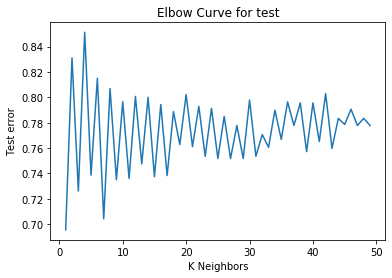

In [34]:
#Choosing the K value

#Defining K range
k = range(1,50)

# calling above defined function
test = Elbow(k)

# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

Text(0.5, 1.0, 'Elbow Curve for test')

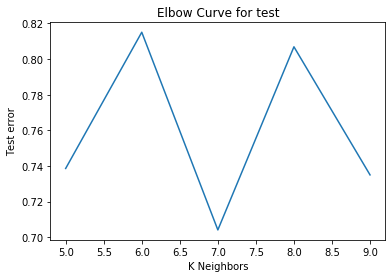

In [36]:
#Defining K range
k = range(5,10)

# calling above defined function
test = Elbow(k)


# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

we can see an elblow curve at 15 & 25, so lets try checking the value at 25 & 15

### Fitting the model with new K value

In [308]:
#Creating an knn object
clf = KNN(n_neighbors=25)


#Fitting the model in train
clf.fit(train_x,train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_simple_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_simple_train )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_simple_test = f1_score(test_predict, test_y)
print('Test F1 Score    ', k_simple_test )

Train F1 Score     0.30719656283566055
Test F1 Score     0.29936305732484075


In [309]:
from sklearn.metrics import classification_report as rep
print(rep( test_predict, test_y ))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1016
           1       0.20      0.62      0.30        76

   micro avg       0.80      0.80      0.80      1092
   macro avg       0.58      0.72      0.59      1092
weighted avg       0.91      0.80      0.84      1092



### Checking the Training F1 and Test F1curve

In [310]:
def F1score(K):
    
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp,train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [311]:
#Defining K range
k = range(1,150)


# calling above defined function
train_f1, test_f1 = F1score(k)


score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,1.000000,0.313559
2,0.457883,0.180064
3,0.576561,0.281330
4,0.384946,0.222930
5,0.473538,0.280112
...,...,...
145,0.086050,0.087649
146,0.086162,0.087649
147,0.086162,0.087649
148,0.083770,0.087649


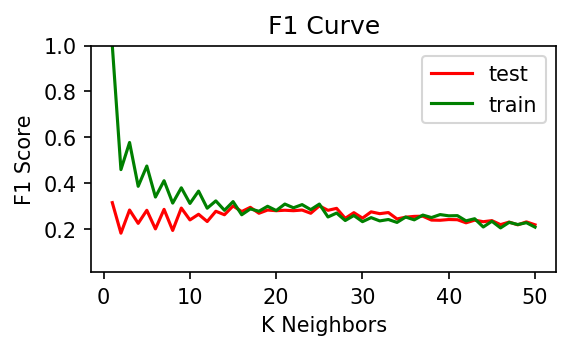

In [312]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:50], test_f1[0:50], color = 'red' , label = 'test')
plt.plot(k[0:50], train_f1[0:50], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.01,1)
plt.legend()

We can see that initially it over fits but as the k value increases we are getting a better fit at around 25 and then it starts to decrease

### Validation Techniques

- Stratified Hold Out validation
- K fold Cross validation

In [486]:
x = df.drop('good_bad_flag',axis=1)
y = df['good_bad_flag']

In [487]:
from sklearn.model_selection import train_test_split
train1_x, test_x , train1_y, test_y = train_test_split(x, y , 
                                          test_size = 0.25 , 
                                          random_state = 101, 
                                          stratify = y)

In [488]:
train_x, val_x, train_y, val_y = train_test_split(train1_x, 
                                     train1_y, 
                                     test_size = 0.25 , 
                                     random_state = 101, 
                                     stratify = train1_y)

print('training data    ',train_x.shape,train_y.shape)
print('validation data  ',val_x.shape,val_y.shape)
print('test data        ',test_x.shape,test_y.shape)

training data     (2457, 80) (2457,)
validation data   (819, 80) (819,)
test data         (1092, 80) (1092,)


In [489]:
train_y.value_counts(normalize=True)

0    0.782255
1    0.217745
Name: good_bad_flag, dtype: float64

In [490]:
val_y.value_counts(normalize=True)

0    0.781441
1    0.218559
Name: good_bad_flag, dtype: float64

In [491]:
test_y.value_counts(normalize=True)

0    0.782051
1    0.217949
Name: good_bad_flag, dtype: float64

In [492]:
#Creating an knn object
clf = KNN(n_neighbors=25)


#Fitting the model in train
clf.fit(train_x,train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_hold_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_hold_train )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(val_x)
k_hold_val = f1_score(test_predict, val_y)
print('validation F1 Score    ', k_hold_val )

Train F1 Score     0.26946107784431134
validation F1 Score     0.2262443438914027


(1, 50)

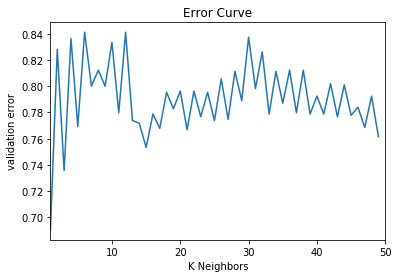

In [493]:
#Choosing the optimal K value

def Elbow(K):
    #initiating empty list
    val_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(val_x)
        tmp = f1_score(tmp,val_y)
        error = 1 - tmp
        val_error.append(error)
    
    return val_error

#*******************************************************************************************#


#Defining K range
k = range(1,50)

# calling above defined function
val = Elbow(k)

# plotting the Curves
plt.plot(k, val)
plt.xlabel('K Neighbors')
plt.ylabel('validation error')
plt.title('Error Curve')
plt.xlim(1,50)


(1, 20)

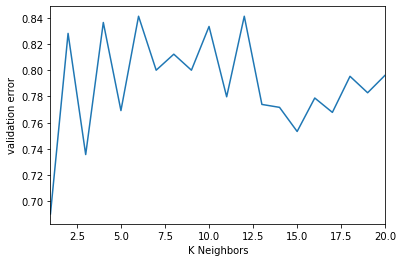

In [494]:
# plotting the Curves
plt.plot(k, val)
plt.xlabel('K Neighbors')
plt.ylabel('validation error')
plt.xlim(1,20)


Here you can see that the least error is at 3 and 15, lets fit those points

In [382]:
from sklearn.model_selection import GridSearchCV

# leaf_size = list(range(1,10))
n_neighbors = [3,15]
p=[1,2]


hyperparameters= dict(n_neighbors=n_neighbors, p=p)

GS= GridSearchCV(KNN(),hyperparameters,cv=10)

best_model = GS.fit(train_x,train_y)


#best parameters values
# print('Best leaf size:',best_model.best_estimator_.get_params()['leaf_size'])

print('best P:', best_model.best_estimator_.get_params()['p'])

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])



y_pred = best_model.predict(test_x)

print(f1_score(y_pred,test_y))

best P: 2
Best n_neighbors: 15
0.23920265780730895


In [383]:
#Creating an knn object
clf = KNN(n_neighbors=15)


#Fitting the model in train
clf.fit(train_x,train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_hold_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_hold_train )


# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_hold_test = f1_score(test_predict, test_y)
print('Test F1 Score    ', k_hold_test )

Train F1 Score     0.27380952380952384
Test F1 Score     0.23920265780730895


In [384]:
from sklearn.metrics import classification_report as rep
print(rep( test_predict, test_y ))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1029
           1       0.15      0.57      0.24        63

   micro avg       0.79      0.79      0.79      1092
   macro avg       0.56      0.69      0.56      1092
weighted avg       0.92      0.79      0.84      1092



Here we can see that at k=15 the result is 0.23 which is lesser than the train and test split

### K fold cross validation

In [457]:
x = df.drop('good_bad_flag',axis=1)
y = df['good_bad_flag']

In [458]:
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 56, stratify=y)

In [459]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)


In [460]:
from sklearn.model_selection import cross_val_score

In [461]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # k fold cross validation for every value of n_neighbor
      score = cross_val_score(KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 8,scoring='f1')
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [462]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

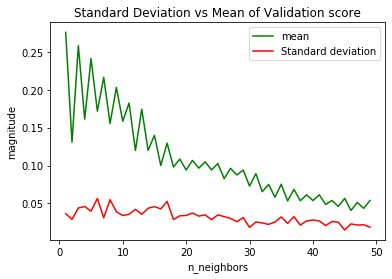

In [463]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation vs Mean of Validation score')
plt.legend()

In [389]:
clf = KNN(n_neighbors =19)

clf.fit(train_x, train_y)


# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_cross_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_cross_train )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_cross_test = f1_score(test_predict, test_y)
print('Test F1 Score    ', k_cross_test )

Train F1 Score     0.2886297376093295
Test F1 Score     0.2483660130718954


In [392]:
from sklearn.metrics import classification_report as rep
print(rep( test_predict, test_y ))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1024
           1       0.16      0.56      0.25        68

   micro avg       0.79      0.79      0.79      1092
   macro avg       0.56      0.68      0.56      1092
weighted avg       0.91      0.79      0.84      1092



### Feature Selection - forward 

In [171]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [420]:
x = df.drop('good_bad_flag',axis=1)
y = df['good_bad_flag']

train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 66, stratify=y)

In [421]:
clf = KNN(n_neighbors =3,p=2)

clf.fit(train_x, train_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [422]:
sfs1 = sfs(clf, k_features=(20,30), forward=True, verbose=2, scoring='f1')

In [423]:
sfs1 = sfs1.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   16.5s finished

[2020-09-11 10:40:20] Features: 1/30 -- score: 0.2987371562528261[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   13.4s finished

[2020-09-11 10:40:34] Features: 2/30 -- score: 0.3433592184447586[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   13.5s finished

[2020-09-11 10:40:47] Features: 3/30 -- score: 0.3537118550618609[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   24.8s finished

[2020-09-11 10:48:31] Features: 28/30 -- score: 0.37216429028281095[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   24.7s finished

[2020-09-11 10:48:56] Features: 29/30 -- score: 0.37682110650644096[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   29.6s finished

[2020-09-11 10:49:26] Features: 30/30 -- score: 0.3796089722927437

In [424]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['approval_time', 'ploan_loanamount_min', 'ploan_loanamount_25%', 'ploan_termdays_min', 'ploan_termdays_25%', 'ploan_termdays_50%', 'ploan_first_return_days_mean', 'ploan_first_return_days_max', 'ploan_additional charges_min_x', 'ploan_additional charges_50%_x', 'ploan_additional charges_75%_x', 'ploan_additional charges_mean_y', 'ploan_additional charges_min_y', 'ploan_additional charges_50%_y', 'bank_account_type_Other', 'bank_account_type_Savings', 'bank_name_clients_Diamond Bank', 'bank_name_clients_EcoBank', 'bank_name_clients_FCMB', 'bank_name_clients_Fidelity Bank', 'bank_name_clients_First Bank', 'bank_name_clients_Heritage Bank', 'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank', 'bank_name_clients_Stanbic IBTC', 'bank_name_clients_Standard Chartered', 'bank_name_clients_Sterling Bank', 'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank', 'bank_name_clients_Wema Bank']


In [425]:
len(train_x.columns)

80

In [426]:
x = df[feat_names]

y = df['good_bad_flag']


train_x,test_x,train_y,test_y = train_test_split(x, y, random_state =56, stratify=y)

In [427]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)

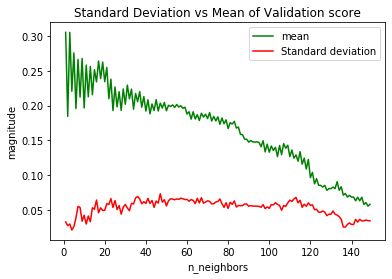

In [442]:
n_neighbors = range(1,150)
mean, std = Val_score(n_neighbors)


plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation vs Mean of Validation score')
plt.legend()

In [441]:
clf = KNN(n_neighbors =20,p=2)

clf.fit(train_x, train_y)


# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k_cross_train = f1_score(train_predict, train_y)
print('Train F1 Score    ', k_cross_train )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_feat_test = f1_score(test_predict, test_y)
print('Test F1 Score    ', k_feat_test )



Train F1 Score     0.27999999999999997
Test F1 Score     0.26058631921824105


In [443]:
from sklearn.metrics import classification_report as rep
print(rep( test_predict, test_y ))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1023
           1       0.17      0.58      0.26        69

   micro avg       0.79      0.79      0.79      1092
   macro avg       0.57      0.69      0.57      1092
weighted avg       0.92      0.79      0.84      1092



In [444]:
# Final Summary

print('Simple KNN', k_simple_test,'\n')

print('Stratified hold out', k_hold_test,'\n')

print('K fold cross', k_cross_test,'\n')

print('k fold feature selected', k_feat_test )

Simple KNN 0.29936305732484075 

Stratified hold out 0.23920265780730895 

K fold cross 0.2483660130718954 

k fold feature selected 0.26058631921824105


Inference: 
- Knn performed slightly better with cross fold and feature selection, but still the f1 score were quite low than that of logistic regression

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]


# hyperparameters= dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# GS= GridSearchCV(KNN(),hyperparameters,cv=10)

# best_model = GS.fit(train_x,train_y)


# #best parameters values
# print('Best leaf size:',best_model.best_estimator_.get_params()['leaf_size'])

# print('best P:', best_model.best_estimator_.get_params()['p'])

# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])



# y_pred = best_model.predict(test_x)

# print(f1_score(y_pred,test_y))

In [ ]:
# params = {'n_neighbors':[2,3,4,5,6,7,8]}

# clf = KNN()

# model = GridSearchCV(clf, params, cv=7)

# model.fit(train_x, train_y)

# print('Best parameters k = {}'.format(model.best_params_))